Valor teérico de la media:  -0.3005637235200877


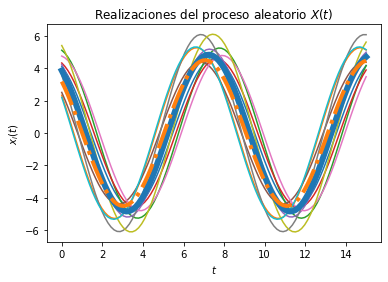

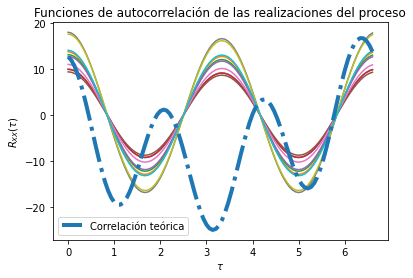

In [9]:
# Laboratorio 4
# Raul Fuentes Duque
# B52812

# Se modifica el código base, basado en el problema 2, para resolver lo 
# solicitado en el problema 4.

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C, Om y Z, añadiendo el valor de Omega, con sus
# respectivos límites
vaC = stats.norm(5, np.sqrt(0.2))
#vaOm = stats.uniform(2*np.pi*59.1, 2*np.pi*60.1)
vaZ = stats.uniform(0, np.pi/2)

# Se define un valor constante para Omega, sabiendo que se encuentra entre
# 371.336 y 377.619
valorOm = 374

# Se define un valor para Theta, sabiendo que se encuentra entre 0 y pi/2
valorTheta = np.pi/4

# Creación del vector de tiempo
T = 100			# número de elementos
# el tiempo se sube para apreciar mejor la grafica
t_final = 15	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C y Z independientes)
# se usa el valor constante en Omega
for i in range(N):
	C = vaC.rvs()
    #Om= vaOm.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(valorOm*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Averiguamos el valor teorico de la media
print('Valor teórico de la media: ',np.mean(P))

# Graficar el resultado teórico del valor esperado
# cambiando los valores de E[X(t)]
E = 10/np.pi * (np.cos(valorOm*t)-np.sin(valorOm*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación, corrigiendo la ecuación y agregando
# los valores constantes de Omega y Theta
Rxx = 25.2 * np.cos(valorOm*t+valorTheta)*np.cos(valorOm*(t+taus)+valorTheta)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()